<a href="https://colab.research.google.com/github/athu-lya/Assignment1/blob/main/week2_Internship_Project_Credit_Score_Classification_Model_Development_Athulya_KM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#checking Enviornment
print('hello world')

hello world


## Build a Classification model with Highest Accuracy, Precison and Recall score. Create a predictive model that categorizes customers into three creditworthiness levels: Good, Standard, and Poor with the given data.

In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [ ]:
#loading the dataset to the enviornment
credit=pd.read_csv('/content/credit (1).csv')

In [ ]:
credit.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


#EDA(Exploratory Data Analysis)

In [ ]:
credit.shape

(100000, 28)

there are 100000 rows and 28 columns in the dataset

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

Dataset has 28 features and 100000 entries. Among that, 21 features are numerical (18 float and 3 integer) and 7 are categorical features.

In [ ]:
credit.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [ ]:
credit.dtypes

,0
ID,int64
Customer_ID,int64
Month,int64
Name,object
Age,float64
SSN,float64
Occupation,object
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,float64


In [ ]:
credit.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
#check for duplicates
credit.duplicated().sum()

0

there is no duplicates in the dataset

In [ ]:
#chech for unique values
(credit.nunique()).sort_values(ascending=False)

,0
ID,100000
Credit_Utilization_Ratio,100000
Monthly_Balance,98494
Monthly_Inhand_Salary,13241
Customer_ID,12500
SSN,12500
Annual_Income,12488
Amount_invested_monthly,12261
Outstanding_Debt,12203
Total_EMI_per_month,11890


Feature 'ID' and ''Credit_Utilization_Ratio' have full of unique values

In [ ]:
credit.drop(['ID','Customer_ID','Month','Name','SSN','Occupation','Type_of_Loan','Credit_Utilization_Ratio'],axis=1,inplace=True)

droped some unnecessary features by assuming that they don’t have any predictive power to predict the target variable.

In [ ]:
#check for null values
credit.isnull().sum()

,0
Age,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


There is no null values in the dataset

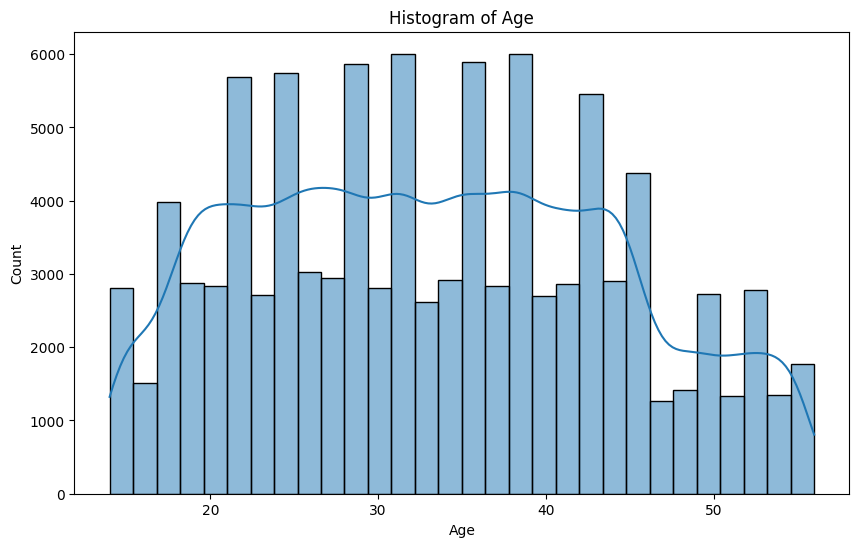

In [ ]:
#Visualization
plt.figure(figsize=(10, 6))
sns.histplot(credit['Age'], kde=True, bins=30)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

<ipython-input-15-ccb554c81998>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = credit['Credit_Mix'],palette = "colorblind");


([0, 1, 2], [Text(0, 0, 'Good'), Text(1, 0, 'Standard'), Text(2, 0, 'Bad')])

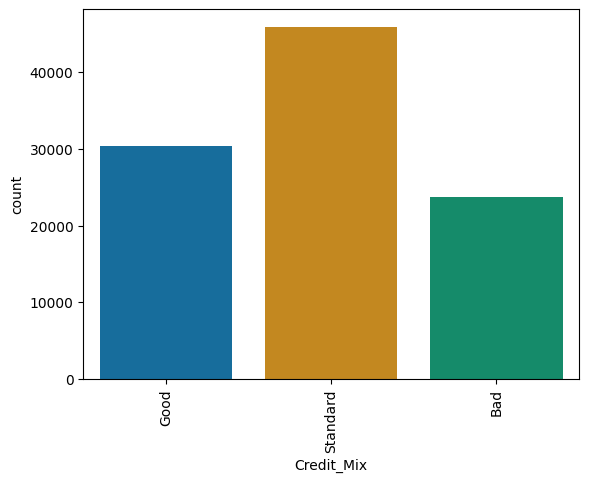

In [ ]:
sns.countplot(x = credit['Credit_Mix'],palette = "colorblind");
plt.xticks(rotation = 90)

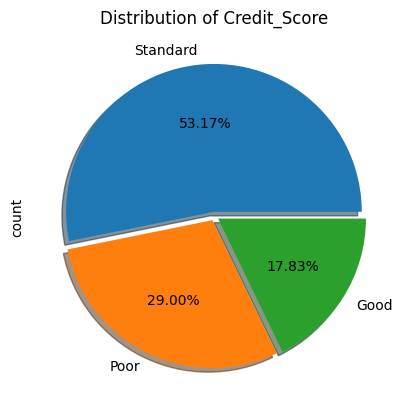

In [ ]:
credit["Credit_Score"].value_counts().plot.pie(explode = [0.03,0.03,0.03], autopct="%1.2f%%",shadow = True,labels = ["Standard","Poor","Good"])
plt.title('Distribution of Credit_Score')
plt.show()

Data is imbalanced since the majority lies in 'standard' i.e, 53.17%, 29% in 'poor' and less in 'good'(17.83%)

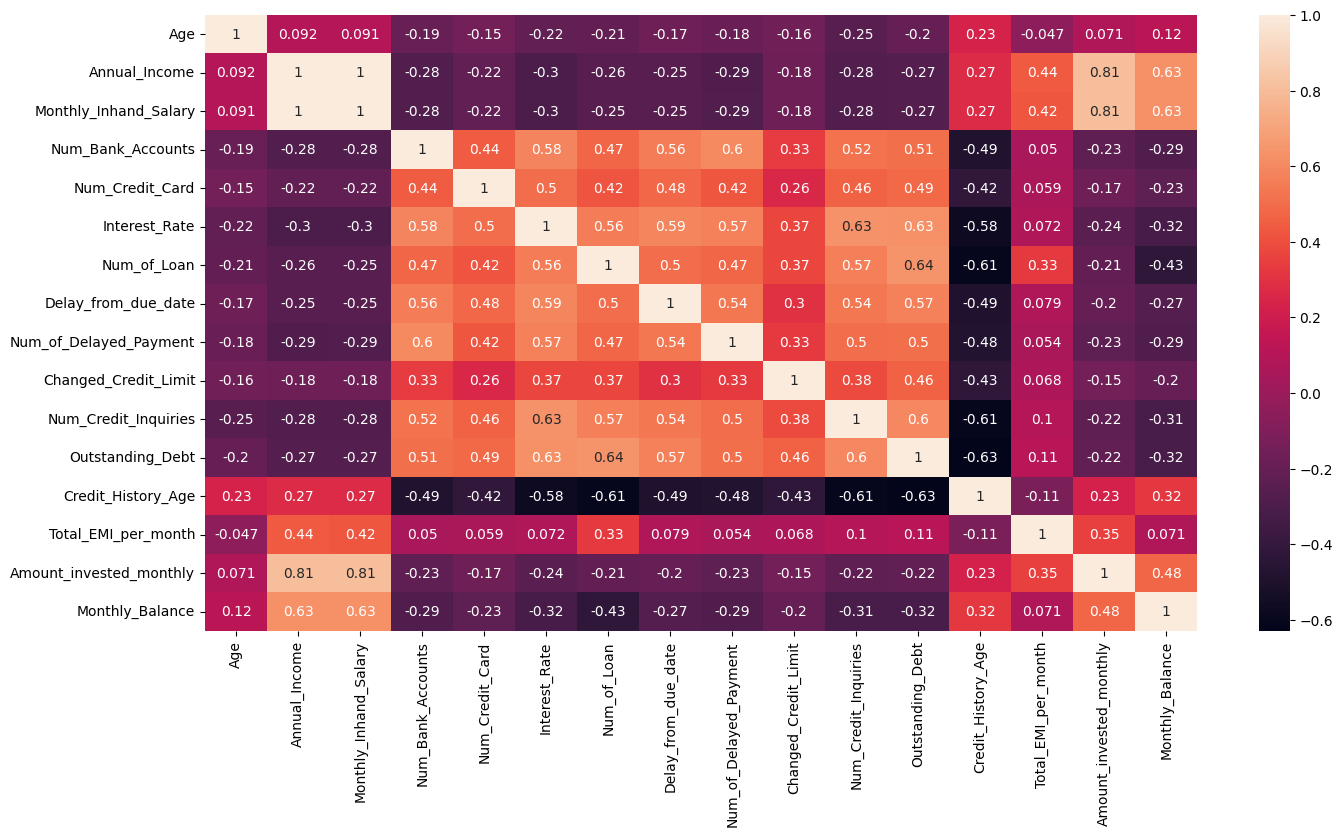

In [ ]:
#Correlation
plt.figure(figsize=(16, 8))
sns.heatmap(credit.select_dtypes(include="number").corr(),annot=True)
plt.show()

'Annual_Income' and 'Monthly_Inhand_Salary' have correlation 1

#**Outlier detection and treatment**

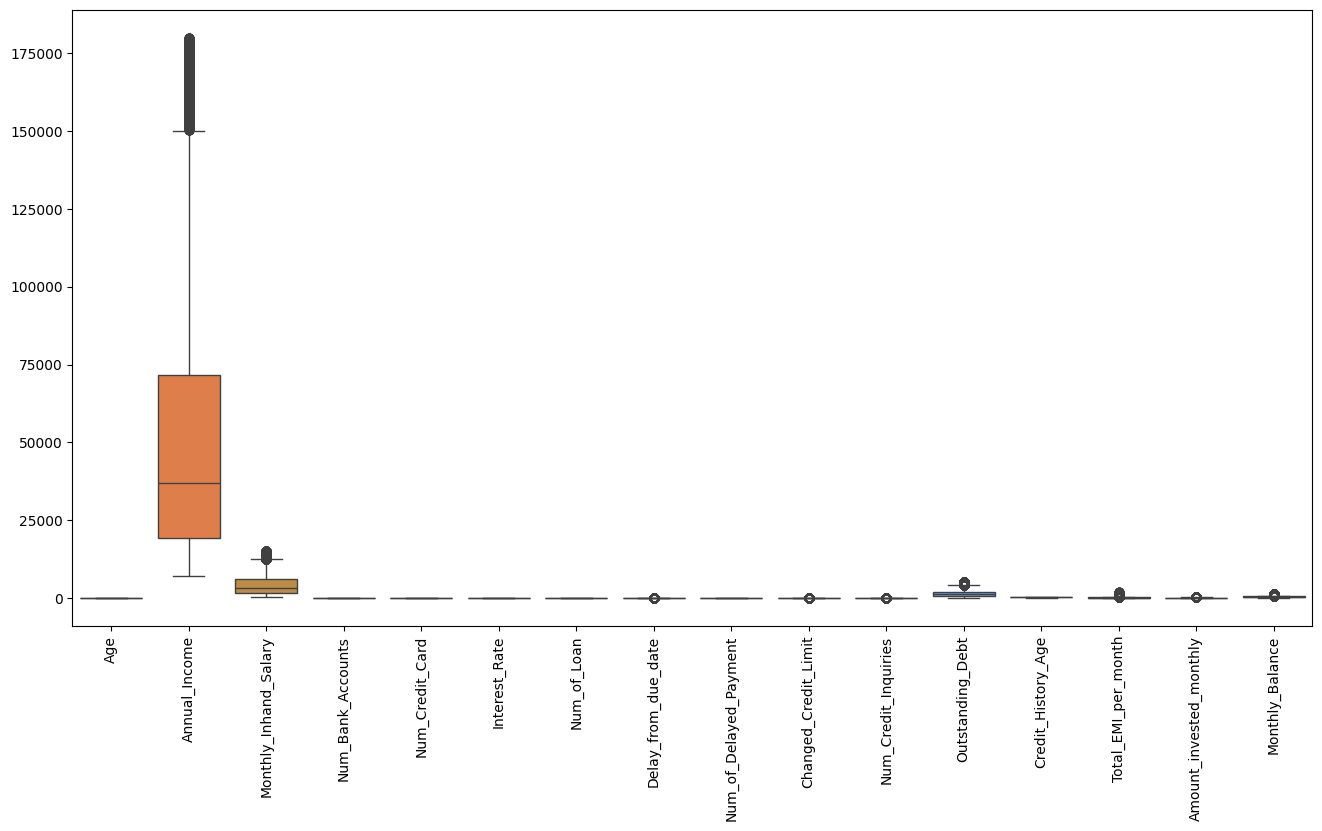

In [ ]:
#check for outliers
plt.figure(figsize=(16, 8))
sns.boxplot(credit)
plt.xticks(rotation=90)
plt.show()

there are outliers present in the dataset

In [ ]:
new_columns=['Annual_Income','Monthly_Inhand_Salary','Delay_from_due_date', 'Changed_Credit_Limit','Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month','Amount_invested_monthly', 'Monthly_Balance']

In [ ]:
for i in new_columns:
    print('Skewness of feature',i,':',credit[i].skew())

Skewness of feature Annual_Income : 1.130222566741384
Skewness of feature Monthly_Inhand_Salary : 1.1286896104040092
Skewness of feature Delay_from_due_date : 0.9698402706723249
Skewness of feature Changed_Credit_Limit : 0.7083424268261724
Skewness of feature Num_Credit_Inquiries : 0.40682536214725384
Skewness of feature Outstanding_Debt : 1.2075361955699684
Skewness of feature Total_EMI_per_month : 4.041492244076896
Skewness of feature Amount_invested_monthly : 1.7610362306626115
Skewness of feature Monthly_Balance : 1.3556137797479813


All 9 features having outliers are skewed distributions. So using IQR (Inter Quartile Range) method for outlier detection and clip function for outlier treatment.

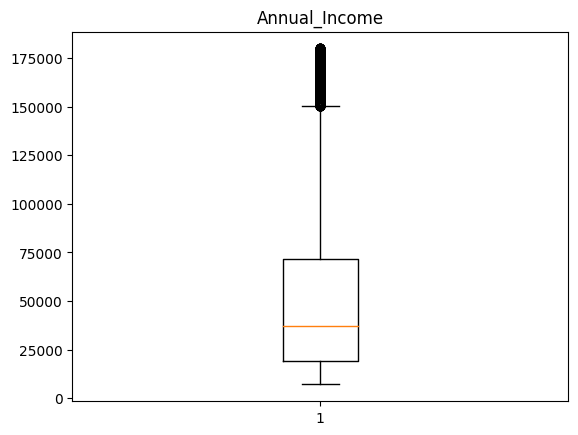

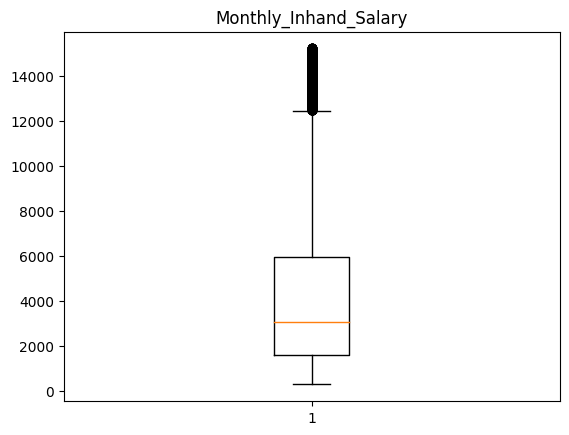

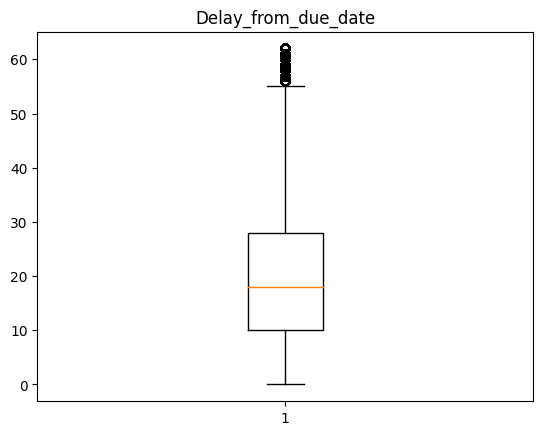

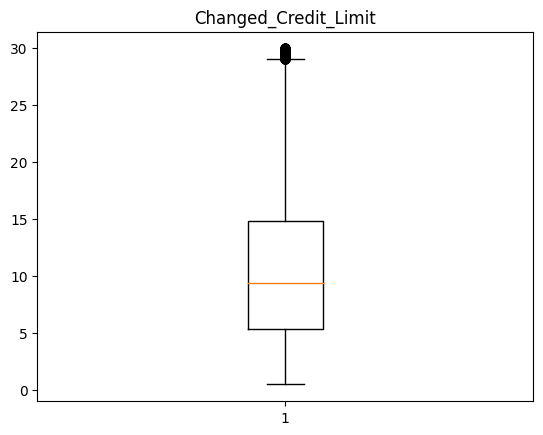

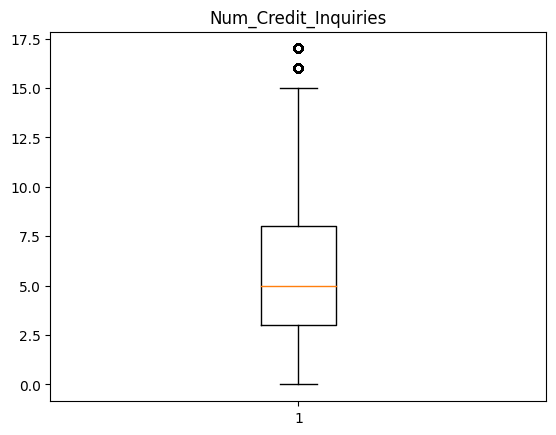

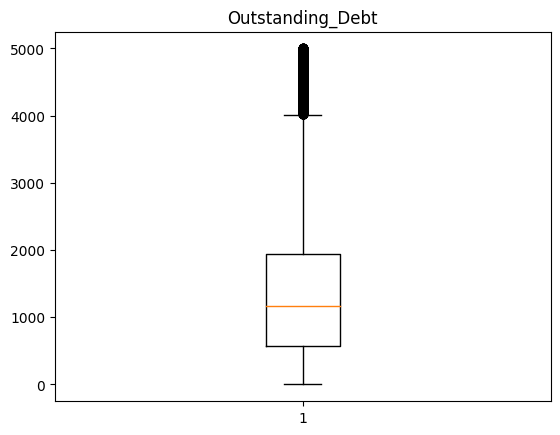

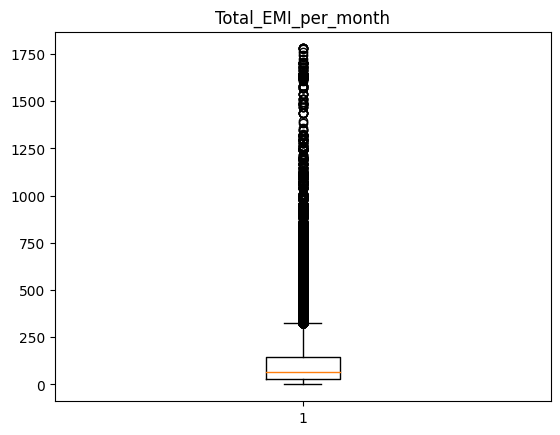

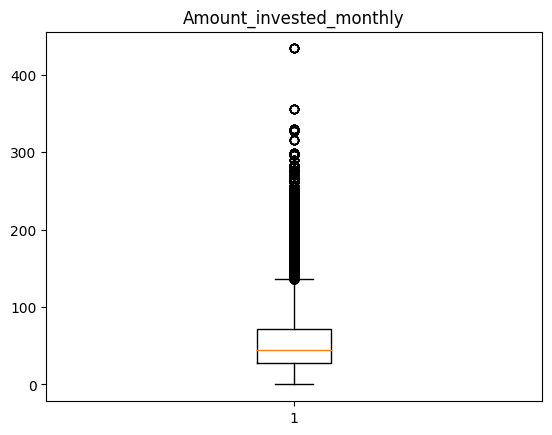

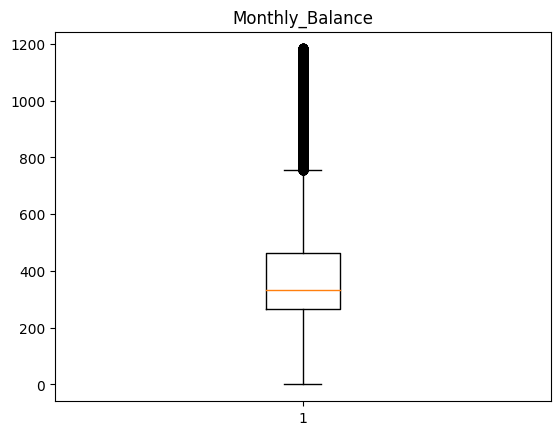

In [ ]:
for i in new_columns:
  plt.figure(i)
  plt.boxplot(credit[i])
  plt.title(i);

In [ ]:
for j in ['Annual_Income','Monthly_Inhand_Salary','Delay_from_due_date', 'Changed_Credit_Limit','Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month','Amount_invested_monthly', 'Monthly_Balance']:
    Q1=np.percentile(credit[j],25,method='midpoint')
    Q2=np.percentile(credit[j],50,method='midpoint')
    Q3=np.percentile(credit[j],75,method='midpoint')
    IQR = Q3-Q1
    low_lim = Q1-1.5*IQR
    up_lim = Q3+1.5*IQR
    outliers = []
    for h in credit[j]:
        if ((h < low_lim) | (h > up_lim)):
            outliers.append(h)
    credit[j]=credit[j].clip(lower=low_lim,upper=up_lim)

In [ ]:
new_columns1=['Annual_Income','Monthly_Inhand_Salary','Delay_from_due_date', 'Changed_Credit_Limit','Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month','Amount_invested_monthly', 'Monthly_Balance']

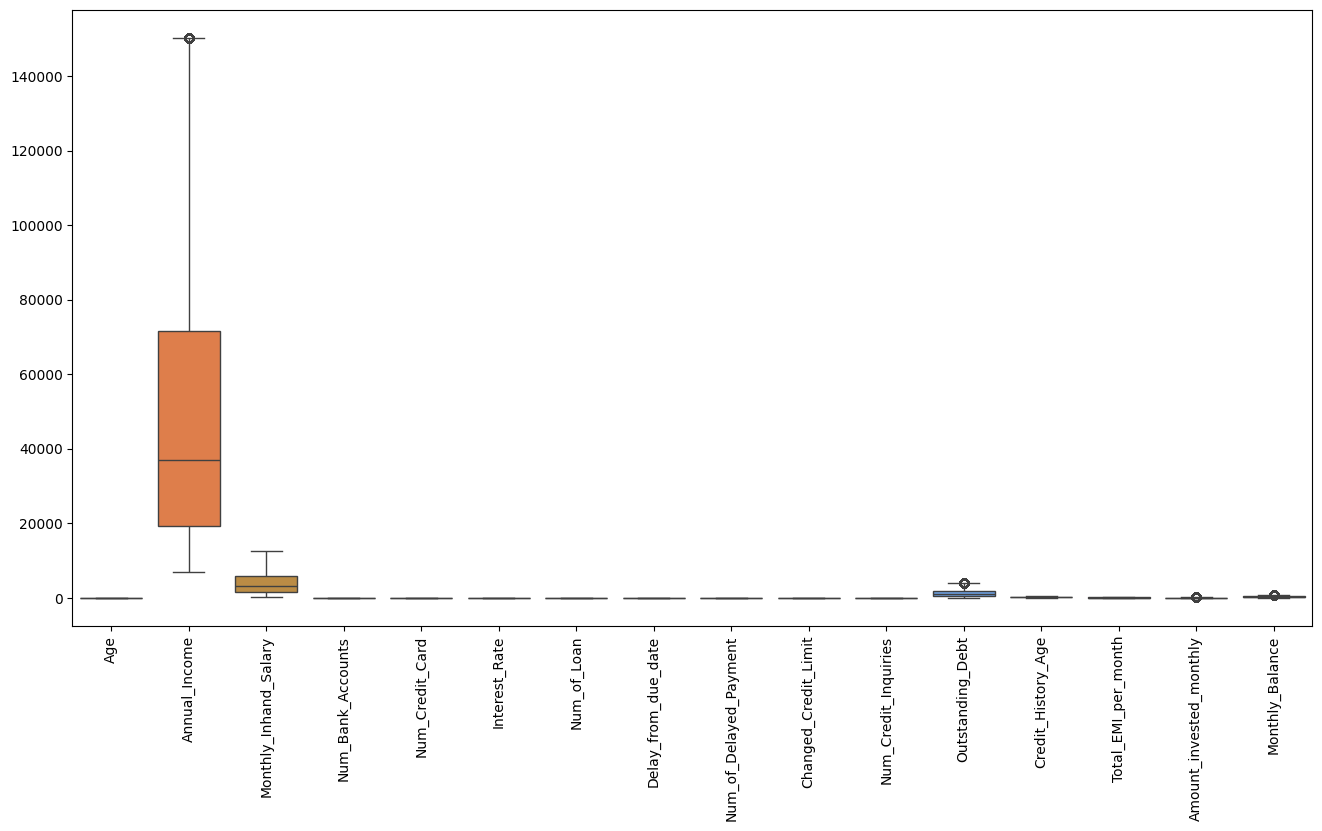

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(credit)
plt.xticks(rotation=90)
plt.show()

All outliers are treated properly. The remaining outliers are the outliers of newly transformed data.

In [ ]:
credit.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
#Label encoding
le = LabelEncoder()
cat_columns=['Credit_Mix','Credit_History_Age','Payment_of_Min_Amount','Credit_Score']
for i in cat_columns:
    credit[i]=le.fit_transform(credit[i])

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      100000 non-null  float64
 1   Annual_Income            100000 non-null  float64
 2   Monthly_Inhand_Salary    100000 non-null  float64
 3   Num_Bank_Accounts        100000 non-null  float64
 4   Num_Credit_Card          100000 non-null  float64
 5   Interest_Rate            100000 non-null  float64
 6   Num_of_Loan              100000 non-null  float64
 7   Delay_from_due_date      100000 non-null  float64
 8   Num_of_Delayed_Payment   100000 non-null  float64
 9   Changed_Credit_Limit     100000 non-null  float64
 10  Num_Credit_Inquiries     100000 non-null  float64
 11  Credit_Mix               100000 non-null  int64  
 12  Outstanding_Debt         100000 non-null  float64
 13  Credit_History_Age       100000 non-null  int64  
 14  Payme

In [ ]:
#ordinal encoding
credit['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [ ]:
Payment_Behaviour_cat=['Low_spent_Small_value_payments','Low_spent_Medium_value_payments','Low_spent_Large_value_payments',
                          'High_spent_Small_value_payments','High_spent_Medium_value_payments','High_spent_Large_value_payments']
Payment_Behaviour_encoder=OrdinalEncoder(categories=[Payment_Behaviour_cat])
credit['Payment_Behaviour']=Payment_Behaviour_encoder.fit_transform(credit[['Payment_Behaviour']])

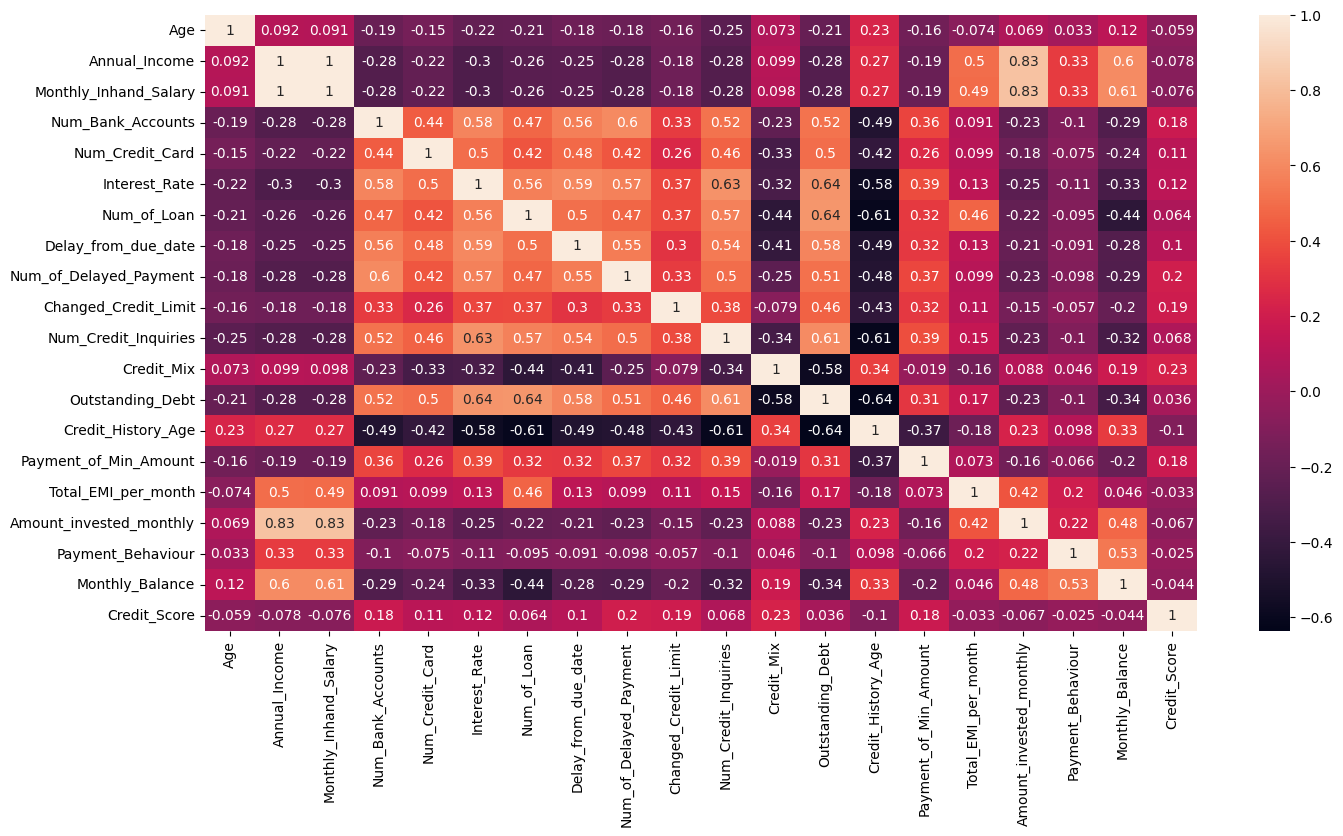

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(credit.corr(),annot=True)
plt.show()

Since the correlation value of 'Annual_Income' and 'Monthly_Inhand_Salary' are one, they are highly correlated. so that droping 'Monthly_Inhand_Salary'.

In [ ]:
credit.drop('Monthly_Inhand_Salary',axis=1,inplace=True)

In [ ]:
credit.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1,809.98,264,1,49.574949,21.46538,3.0,312.494089,0
1,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,1,809.98,265,1,49.574949,21.46538,2.0,284.629162,0
2,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1,809.98,266,1,49.574949,21.46538,1.0,331.209863,0
3,23.0,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,1,809.98,267,1,49.574949,21.46538,0.0,223.451310,0
4,23.0,19114.12,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,1,809.98,268,1,49.574949,21.46538,4.0,341.489231,0


In [ ]:
#setting the target variable and independentb variables
x=credit.drop('Credit_Score',axis=1)
y=credit['Credit_Score']
y=pd.DataFrame(y,columns=['Credit_Score'])

In [ ]:
sc=StandardScaler()
x_sc=sc.fit_transform(x)
x=pd.DataFrame(x_sc,columns=x.columns)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [ ]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_val=sc.fit_transform(x_val)
x_test=sc.fit_transform(x_test)

#Modelling

Decision Trees

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
decision_tree_pred = decision_tree.predict(x_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
decision_tree_precision = precision_score(y_test, decision_tree_pred, average='macro')
decision_tree_recall = recall_score(y_test, decision_tree_pred, average='macro')
decision_tree_f1 = f1_score(y_test, decision_tree_pred, average='macro')
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,decision_tree_pred))
print("precision_score:",decision_tree_precision)
print("recall_score:",decision_tree_recall)
print("f1_score:",decision_tree_f1)

Decision Tree Accuracy: 0.723
confusion_matrix: [[1137   68  533]
 [  62 2099  819]
 [ 542  746 3994]]
precision_score: 0.7069121920164877
recall_score: 0.7049052062053116
f1_score: 0.7058687532961412


Random Forest

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
random_forest_pred = random_forest.predict(x_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
random_forest_precision = precision_score(y_test, random_forest_pred, average='macro')
random_forest_recall = recall_score(y_test, random_forest_pred, average='macro')
random_forest_f1 = f1_score(y_test, random_forest_pred, average='macro')
print("Random Forest Accuracy:", random_forest_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,random_forest_pred))
print("precision_score:",random_forest_precision)
print("recall_score:",random_forest_recall)
print("f1_score:",random_forest_f1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 0.8149
confusion_matrix: [[1324    8  406]
 [  16 2485  479]
 [ 340  602 4340]]
precision_score: 0.8072083878860514
recall_score: 0.8057820823372146
f1_score: 0.8063149927623291


Logistic Regression

In [ ]:
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)
logistic_reg_pred = logistic_reg.predict(x_test)
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_pred)
logistic_precision = precision_score(y_test, logistic_reg_pred, average='macro')
logistic_recall = recall_score(y_test, logistic_reg_pred, average='macro')
logistic_f1 = f1_score(y_test, logistic_reg_pred, average='macro')
print("logistic_reg_accuracy:", logistic_reg_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,logistic_reg_pred))
print("precision_score:",logistic_precision)
print("recall_score:",logistic_recall)
print("f1_score:",logistic_f1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


logistic_reg_accuracy: 0.6487
confusion_matrix: [[ 962   18  758]
 [ 147 1590 1243]
 [ 597  750 3935]]
precision_score: 0.6336989041635582
recall_score: 0.6106832631124566
f1_score: 0.6186441817876306


SVM

In [ ]:
svm = SVC()
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='macro')
svm_recall = recall_score(y_test, svm_pred, average='macro')
svm_f1 = f1_score(y_test, svm_pred, average='macro')
print("SVM Accuracy:", svm_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,svm_pred))
print("precision_score:",svm_precision)
print("recall_score:",svm_recall)
print("f1_score:",svm_f1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy: 0.7176
confusion_matrix: [[1274   16  448]
 [ 238 1911  831]
 [ 718  573 3991]]
precision_score: 0.6976686504255977
recall_score: 0.7099622135561946
f1_score: 0.6986755427384294


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Initialize Random Search
random_search = RandomizedSearchCV(estimator=logistic_reg, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(x_train, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
225 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 1}
Best Model: LogisticRegression(C=1, penalty='l1', solver='saga')


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred_lg_hpt = best_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lg_hpt)
report = classification_report(y_test, y_pred_lg_hpt)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.6487
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.55      0.56      1738
           1       0.67      0.53      0.60      2980
           2       0.66      0.74      0.70      5282

    accuracy                           0.65     10000
   macro avg       0.63      0.61      0.62     10000
weighted avg       0.65      0.65      0.65     10000



In [70]:
rf_clf1=RandomForestClassifier(n_estimators=10,criterion='entropy',max_features='sqrt') # Changed max_features to 'sqrt'
rf_clf1.fit(x_train, y_train)
rf_pred1=rf_clf1.predict(x_val)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [72]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
# Assuming you have your original training data in x_train and y_train

smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

rf_clf1_b=RandomForestClassifier(n_estimators=10,criterion='gini',max_features='sqrt')
rf_clf1_b.fit(x_train_balanced, y_train_balanced)
rf_pred1_b=rf_clf1_b.predict(x_val)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [73]:
dt_clf1=DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=200)
dt_clf1.fit(x_train, y_train)
dt_pred1=dt_clf1.predict(x_val)

In [74]:
dt_clf1_b=DecisionTreeClassifier(class_weight='balanced',criterion='entropy')
dt_clf1_b.fit(x_train_balanced, y_train_balanced)
dt_pred1_b=dt_clf1_b.predict(x_val)

In [75]:
mux = pd.MultiIndex.from_product([['Without Oversampling','With Oversampling'],['Random Forest','DecisionTree']])
Metric=['Train Accuracy','Validation Accuracy','Precision','Recall','F1 Score']
comp_table = pd.DataFrame([[rf_clf1.score(x_train,y_train),dt_clf1.score(x_train,y_train),
                            rf_clf1_b.score(x_train_balanced,y_train_balanced),dt_clf1_b.score(x_train_balanced,y_train_balanced)],
                            [accuracy_score(y_val,rf_pred1),accuracy_score(y_val,dt_pred1),
                            accuracy_score(y_val,rf_pred1_b),accuracy_score(y_val,dt_pred1_b)],
                            [precision_score(y_val,rf_pred1,average='weighted'),precision_score(y_val,dt_pred1,average='weighted'),
                            precision_score(y_val,rf_pred1_b,average='weighted'),precision_score(y_val,dt_pred1_b,average='weighted')],
                            [recall_score(y_val,rf_pred1,average='weighted'),recall_score(y_val,dt_pred1,average='weighted'),
                            recall_score(y_val,rf_pred1_b,average='weighted'),recall_score(y_val,dt_pred1_b,average='weighted')],
                            [f1_score(y_val,rf_pred1,average='weighted'),f1_score(y_val,dt_pred1,average='weighted'),
                            f1_score(y_val,rf_pred1_b,average='weighted'),f1_score(y_val,dt_pred1_b,average='weighted')]],columns=mux)
comp_table.index=Metric
comp_table

Without Oversampling              With Oversampling  \
                           Random Forest DecisionTree     Random Forest   
Train Accuracy                  0.986187      1.00000          0.989853   
Validation Accuracy             0.799900      0.72600          0.740200   
Precision                       0.800943      0.72550          0.780975   
Recall                          0.799900      0.72600          0.740200   
F1 Score                        0.799996      0.72566          0.741140   

                                  
                    DecisionTree  
Train Accuracy          1.000000  
Validation Accuracy     0.562300  
Precision               0.636165  
Recall                  0.562300  
F1 Score                0.551031